In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split

In [8]:
# Load the training data files, because test files doesnt have labels
data = pd.read_csv('dataset/flavours-of-physics/check_agreement.csv')

In [9]:
# Drop columns that are not used as features
features = data.drop(['signal', 'id', 'SPDhits', 'weight'], axis=1)

# Target variable
labels = data['signal']

In [10]:
model_lgb = lgb.Booster(model_file='saved_models/lgb.txt')

model_xgb = xgb.Booster(model_file='saved_models/xgb.txt')

In [11]:
pred_xgb = model_xgb.predict(xgb.DMatrix(features))
pred_lgb = model_lgb.predict(features)

<ipython-input-13-484237df1444>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(tpr_xgb, 1-fpr_xgb, 'b', label = 'xgb-%0.2f' % roc_auc_xgb, color = 'red')


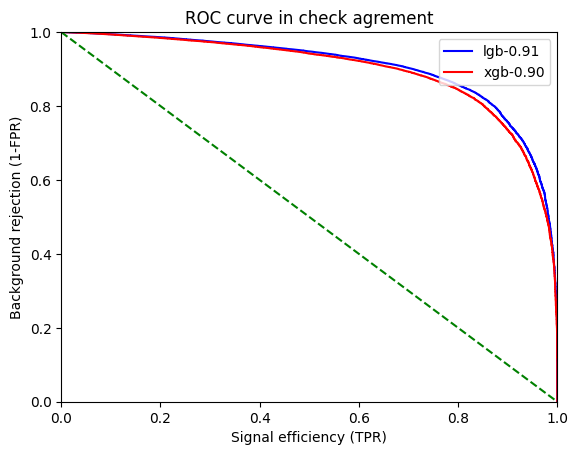

In [13]:
#roc curve for having threshold independ score
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification

fpr_lgb, tpr_lgb, threshold_lgb = metrics.roc_curve(labels, pred_lgb)
fpr_xgb, tpr_xgb, threshold_xgb = metrics.roc_curve(labels, pred_xgb)
roc_auc_lgb = metrics.auc(fpr_lgb, tpr_lgb)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)


plt.style.use('default')
plt.title('ROC curve in check agrement')
plt.plot(tpr_lgb, 1-fpr_lgb, 'b', label = 'lgb-%0.2f' % roc_auc_lgb)
plt.plot(tpr_xgb, 1-fpr_xgb, 'b', label = 'xgb-%0.2f' % roc_auc_xgb, color = 'red')
plt.legend(loc = 'upper right')
plt.plot([0, 1], [1, 0],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Signal efficiency (TPR)')
plt.ylabel('Background rejection (1-FPR)')
plt.show()